# Capstone Project 1 - EDA
## Name: Brock Nosbisch

#### Summary:
This is a continuation from the "Capstone Project 1 - Data Wrangling" and "Capstone Project 1 - Data Story" notebooks.  The data from the "Data Wrangling" notebooks was written to the data_wrangling_out.csv file which is read into the Capstone Project 1 - Data Story notebook and that notebook is imported into this EDA notebook. 

The problem I am trying to solve is to predict the probability of someone defaulting on payment (>90 days late).  The end goal is to emphasize on several algorithms and review the performance and strengths and weaknesses of each.  After doing EDA, there are several correlations that are of statistical significance and a few that have practical signficance.

When comparing the Pearson correlation between each Past Due Bucket and Serious Delinquent, each has statistical and practical signficance.  And when looking at the correlation between Monthly Income Buckets, Debt Ratio, and Open Credit Lines correlation to Serious Delinquency, each is of statistical significance but all have an r^2 less than 1% so they are of no practical significance.  Age by Past Due Buckets is also statistically significant but of no practical signifance.

Based on the Bootstrap Estimate of Serious Delinquent Average, the 95% confidence interval of the entire dataset to be Seriously Delinquent is from 6.474% to 6.725%.


# Load Data

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
# from statsmodels.nonparametric.kernel_regression import KernelReg


In [126]:
# Import my data story notebook.
import import_ipynb
import Capstone_1_Data_Story as ds

### Functions

In [127]:
def pearsonr_ci(x,y,alpha=0.05):

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    low_z, high_z = r_z-z*se, r_z+z*se
    low, high = np.tanh((low_z, high_z))
    return r, p, low, high

# Bootstrap Replicates	
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


# Exploratory Data Analysis

## Pearson Correlation
### We can see that based on the Pearson Correlation, Serious Delinquency has a higher r value when correlated with the Past Due buckets.  r keeps getting larger as you go from 30-59 days, 60-89 days, and 90+ days.

In [128]:
df = ds.df
df.corr(method='pearson')

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
age,1.000000,0.981561,0.023857,0.022142,0.041563,0.037341,-0.056543,-0.071845,-0.089553,-0.069854,-0.076682,-0.082392,-0.096198,0.144742,-0.112979,-0.005955,0.031280,-0.214573
age_bucket,0.981561,1.000000,0.022767,0.021549,0.040640,0.037002,-0.055498,-0.070543,-0.088541,-0.067922,-0.075004,-0.080673,-0.094615,0.141598,-0.110557,-0.006499,0.030593,-0.211333
debt_ratio,0.023857,0.022767,1.000000,0.264491,0.452315,-0.028737,-0.286322,0.003492,0.001497,-0.004196,-0.004713,-0.009848,-0.012922,0.049183,-0.007069,0.003955,0.119862,-0.040790
debt_ratio_bucket,0.022142,0.021549,0.264491,1.000000,0.524069,-0.074058,-0.584915,0.048546,0.040902,0.016900,0.010772,-0.012254,-0.022143,0.197305,0.023582,0.002711,0.335688,-0.034333
debt_ratio_name,0.041563,0.040640,0.452315,0.524069,1.000000,-0.039429,-0.553173,-0.003871,-0.009051,-0.010219,-0.012844,-0.018511,-0.024413,0.063643,-0.021686,0.005717,0.159920,-0.079229
monthly_income,0.037341,0.037002,-0.028737,-0.074058,-0.039429,1.000000,0.333253,-0.001914,-0.002578,-0.011535,-0.012378,-0.019882,-0.024018,0.091026,-0.019119,0.007118,0.124710,0.062511
monthly_income_bucket,-0.056543,-0.055498,-0.286322,-0.584915,-0.553173,0.333253,1.000000,0.036914,0.039262,-0.004973,-0.004789,-0.025380,-0.029278,0.234739,-0.007631,0.006365,0.223963,0.244954
past_due_30_59,-0.071845,-0.070543,0.003492,0.048546,-0.003871,-0.001914,0.036914,1.000000,0.812041,0.305879,0.300748,0.218149,0.256566,0.080073,0.274553,-0.002818,0.042756,0.063610
past_due_30_59_flag,-0.089553,-0.088541,0.001497,0.040902,-0.009051,-0.002578,0.039262,0.812041,1.000000,0.240420,0.251075,0.192123,0.227021,0.068947,0.241231,-0.002372,0.034909,0.069079
past_due_60_89,-0.069854,-0.067922,-0.004196,0.016900,-0.010219,-0.011535,-0.004973,0.305879,0.240420,1.000000,0.865304,0.294638,0.298305,-0.021907,0.268130,-0.002441,-0.020695,0.036751


### Setup an appropriate hypothesis test.
* Null Hypothesis: There is no significant correlation between Serious Delinquency and Past Due By Days.
* Alternative Hypothesis: There is a significant correlation between Serious Delinquency and Past Due By Days.

### As expected, the below shows the that the Past Due Flags are correlated with the Serious Delinquent Flag.  As the Past Due Days get larger, (from 30-59, 60-89, 90+ days), the r^2 value gets larger with the 90+ Days having r^2 of .33.
### We can, without a doubt, reject the Null Hypothesis.
    

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149730 entries, 1 to 150000
Data columns (total 20 columns):
age                      149730 non-null int64
age_bucket               149730 non-null float64
age_bucket_name          149730 non-null object
debt_ratio               149730 non-null float64
debt_ratio_bucket        149730 non-null float64
debt_ratio_name          149730 non-null float64
monthly_income           120120 non-null float64
monthly_income_bucket    149730 non-null int64
monthly_income_name      149730 non-null object
past_due_30_59           149730 non-null int64
past_due_30_59_flag      149730 non-null float64
past_due_60_89           149730 non-null int64
past_due_60_89_flag      149730 non-null float64
past_due_90_plus         149730 non-null int64
past_due_90_plus_flag    149730 non-null float64
open_credit_lines        149730 non-null int64
serious_delinquent       149730 non-null int64
unsecured_lines          149730 non-null float64
real_estate_loans      

In [130]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['past_due_30_59_flag'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Past Due 30-59 Days')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Past Due 30-59 Days
p-value: 0.0
r: 0.24123095914912063
r^2: 0.058192375652004705
CI: 0.2364547042508215 to 0.24599555630325018


In [131]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['past_due_60_89_flag'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Past Due 60-89 Days')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Past Due 60-89 Days
p-value: 0.0
r: 0.26661967500852773
r^2: 0.07108605110165295
CI: 0.2619082020802465 to 0.27131843964736596


In [132]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['past_due_90_plus_flag'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Past Due 90+ Days')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Past Due 90+ Days
p-value: 0.0
r: 0.3327330719621715
r^2: 0.1107112971773836
CI: 0.328221066189084 to 0.3372298946998459


### Setup an appropriate hypothesis test.
* Null Hypothesis: There is no significant correlation between Serious Delinquency and Monthly Income Buckets, Debt Ratio, or Open Credit Lines.
* Alternative Hypothesis: There is a significant correlation between Serious Delinquency and Monthly Income Buckets, Debt Ratio, or Open Credit Lines.

### The below shows the Monthly Income Buckets, Debt Ratio, and Open Credit Lines correlation to the Serious Delinquent Flag.  All have a p-value < .05 so there is a statistical significance in the correlations but there is little practical significance since all r^2 values are small (<.1%) which means that the correlation accounts for less than .1% of the variability.


In [133]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['monthly_income_bucket'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Monthly Income')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Monthly Income
p-value: 0.0031473088836828787
r: -0.007631363920487092
r^2: 5.8237715286912124e-05
CI: -0.012696046541085356 to -0.0025662897424324855


In [134]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['debt_ratio'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Debt Ratio')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Debt Ratio
p-value: 0.006228313260364828
r: -0.0070694001491645115
r^2: 4.997641846900722e-05
CI: -0.012134139028984067 to -0.0020042985426767237


In [135]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['open_credit_lines'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent Flag')
print('Independent: Open Credit Lines')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent Flag
Independent: Open Credit Lines
p-value: 6.7314043367713414e-21
r: -0.024232041465668614
r^2: 0.0005871918335938831
CI: -0.02929361935761476 to -0.019169220910207563


### Viewing Age by Past Due, we can see that there is a negative correlation meaning that the younger someone is, the higher the chance of being past due.

In [136]:
df[['age','past_due_30_59_flag','past_due_60_89_flag','past_due_90_plus_flag','serious_delinquent']].corr(method='pearson')

,age,past_due_30_59_flag,past_due_60_89_flag,past_due_90_plus_flag,serious_delinquent
age,1.000000,-0.089553,-0.076682,-0.096198,-0.112979
past_due_30_59_flag,-0.089553,1.000000,0.251075,0.227021,0.241231
past_due_60_89_flag,-0.076682,0.251075,1.000000,0.291705,0.266620
past_due_90_plus_flag,-0.096198,0.227021,0.291705,1.000000,0.332733
serious_delinquent,-0.112979,0.241231,0.266620,0.332733,1.000000


### To prove the above out, setup an appropriate hypothesis test.
* Null Hypothesis: There is no significant correlation between being Past Due and Age.
* Alternative Hypothesis: There is a significant correlation between being Past Due and Age.

### As expected, the below shows the that the Age is negatively correlated with the Past Due Flags.  

In [137]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['age'], y=df['past_due_30_59_flag'], alpha=.05)

print('Dependent: Past Due 30-59 Days')
print('Independent: Age')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Past Due 30-59 Days
Independent: Age
p-value: 3.663079671989339e-264
r: -0.08955314371262713
r^2: 0.008019765548814447
CI: -0.09457541747115 to -0.08452631165760664


In [138]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['age'], y=df['past_due_60_89_flag'], alpha=.05)

print('Dependent: Past Due 60-89 Days')
print('Independent: Age')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Past Due 60-89 Days
Independent: Age
p-value: 4.805295472034942e-194
r: -0.07668246205392479
r^2: 0.0058801999866516155
CI: -0.08171589616142474 to -0.07164511635519083


In [139]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['age'], y=df['past_due_90_plus_flag'], alpha=.05)

print('Dependent: Past Due 90+ Days')
print('Independent: Age')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Past Due 90+ Days
Independent: Age
p-value: 1.133477492273373e-304
r: -0.09619772796056858
r^2: 0.009254002864775557
CI: -0.10121358419059122 to -0.0911769813137903


In [140]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['age'], y=df['serious_delinquent'], alpha=.05)

print('Dependent: Serious Delinquent')
print('Independent: Age')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Dependent: Serious Delinquent
Independent: Age
p-value: 0.0
r: -0.11297879078283807
r^2: 0.012764207166752296
CI: -0.11797645128939278 to -0.10797540710711141


### Additional Hypothesis Tests
* Null Hypothesis: There is no significant correlation between the 2 independent variables.
* Alternative Hypothesis: There is a significant correlation between the 2 independent variables.

#### Each of the below tests are significant and reject the Null Hypothesis but this is expected.  


In [141]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['age'], y=df['open_credit_lines'], alpha=.05)

print('Independent: Open Credit Lines')
print('Independent: Age')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Independent: Open Credit Lines
Independent: Age
p-value: 0.0
r: 0.1447419640551312
r^2: 0.020950236158536893
CI: 0.1397792688917278 to 0.14969738781765551


In [142]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['real_estate_loans'], y=df['open_credit_lines'], alpha=.05)

print('Independent: Open Credit Lines')
print('Independent: Real Estate Loans')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Independent: Open Credit Lines
Independent: Real Estate Loans
p-value: 0.0
r: 0.43266866422509553
r^2: 0.18720217300232847
CI: 0.42854266000109265 to 0.43677662337419804


In [143]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['debt_ratio'], y=df['real_estate_loans'], alpha=.05)

print('Independent: Debt Ratio')
print('Independent: Real Estate Loans')
print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

Independent: Debt Ratio
Independent: Real Estate Loans
p-value: 0.0
r: 0.11986204784290087
r^2: 0.014366910513093857
CI: 0.11486661252069078 to 0.12485142116758134


## Bootstrap Estimate of Serious Delinquent Mean
### This is showing that overall, the 95% confidence interval for Seriously Delinquency is from 6.474% to 6.725%.

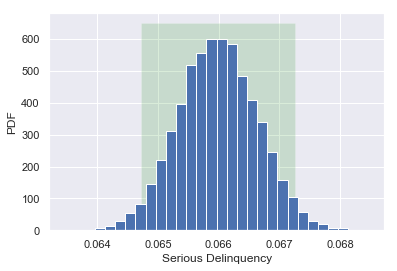


Bootstrap 95% Confidence Interval
[0.06471649 0.06725439]


In [144]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df['serious_delinquent'], np.mean)
    
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('Serious Delinquency')
_ = plt.ylabel('PDF')
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

plt.fill_between(conf_int, 0, 650, facecolor='green', alpha = .15, interpolate=True)

plt.show()

print()

print('Bootstrap 95% Confidence Interval')
print(conf_int)